In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gc
import data_utils as dutils
import math
from pathlib import Path
from datetime import datetime

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

%matplotlib inline

In [136]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def get_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_val), y_val),
                m.score(X_train, y_train), m.score(X_val, y_val)]
    return res

In [104]:
df = dutils.loadData()
df = df.drop(columns=['CODNEG'])

In [105]:
df.head()

,PREABE,PREMAX,PREMIN,PREMED,PREULT,PREOFC,PREOFV,TOTNEG,QUATOT,VOLTOT
DATPRG,,,,,,,,,,
2020-01-02,112.45,114.24,112.13,113.41,114.24,114.24,114.27,44941,5684380,644704844.5
2020-01-03,112.93,114.50,112.80,113.67,113.80,113.79,113.80,41215,6602450,750525102.8
2020-01-06,113.00,113.45,112.02,112.69,112.59,112.50,112.59,49161,6771940,763170182.1
2020-01-07,112.90,112.90,111.59,112.15,112.24,112.24,112.50,82364,6096900,683798812.7
2020-01-08,112.65,113.10,111.40,112.09,111.95,111.90,111.95,46982,6472610,725559204.5


In [106]:
START_DATE = '2020-05-01'
END_DATE = '2020-10-31'
SPLIT_TRAIN = '2020-09-15'
SPLIT_TEST = '2020-09-16'
FEATURES = ['PREABE','PREMAX','PREMIN','PREMED','PREOFC','PREOFV','TOTNEG','QUATOT','VOLTOT']
Y = ['PREULT']

In [108]:
df = df[START_DATE: END_DATE]

In [109]:
df

,PREABE,PREMAX,PREMIN,PREMED,PREULT,PREOFC,PREOFV,TOTNEG,QUATOT,VOLTOT
DATPRG,,,,,,,,,,
2020-05-04,75.17,76.30,74.77,75.44,76.10,76.10,76.12,79102,10111650,7.628309e+08
2020-05-05,77.00,78.14,76.20,77.24,76.54,76.54,76.69,3272,11236200,8.679041e+08
2020-05-06,76.82,77.06,75.15,76.04,76.20,76.18,76.20,6996,6296420,4.787982e+08
2020-05-07,77.08,77.21,75.17,76.06,75.40,75.40,75.67,12708,12412860,9.442111e+08
2020-05-08,76.94,77.58,76.50,77.00,77.43,77.40,77.43,47653,10911150,8.402252e+08
...,...,...,...,...,...,...,...,...,...,...
2020-10-26,97.00,97.99,96.02,97.14,97.23,97.23,97.25,46301,8803970,8.552515e+08
2020-10-27,97.41,97.88,95.63,96.39,95.68,95.66,95.68,32090,9534310,9.191005e+08
2020-10-28,94.00,94.08,91.56,92.52,91.56,91.56,91.60,28103,18677788,1.728168e+09


In [110]:
train_df = df[:SPLIT_TRAIN]
test_df = df[SPLIT_TEST:]

In [111]:
X_train, y_train = train_df[FEATURES], np.array(train_df[Y]).flatten()
X_val, y_val = test_df[FEATURES], np.array(test_df[Y]).flatten()

In [168]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

In [ ]:
results = []
for est in range(1, 20):
    for leaves in range(1, 20):
        model = RandomForestRegressor(n_estimators=est, bootstrap=True, min_samples_leaf=leaves)
        model.fit(train_x, train_y)
        score = get_score(model)        
        results.append({ 'est': est, 'leaves': leaves, 'score': score})
        
for result in results:
    print(f"trees: {result['est']}  leaves: {result['leaves']} \n score: rmse train {result['score'][0]}, rmse val {result['score'][1]}, r^2 train {result['score'][2]}, r^2 val {result['score'][3]}")

In [ ]:
estimators = range(1, 20)
leaves = range(1,40)
parameters = {
    "n_estimators": estimators,
    "min_samples_leaf": leaves,
    }
cv = ShuffleSplit(test_size=0.01, n_splits=1)
grid = GridSearchCV(RandomForestRegressor(bootstrap=True), parameters, cv=cv, verbose=1, return_train_score=True)
grid.fit(train_x, train_y)

In [171]:
print_score(grid)

rmse train 0.571724077726861, rmse val 0.42575300938455013, r^2 train 0.9946575650637363, r^2 val 0.9630548865304571


In [172]:
model.estimators_[0].get_depth()

1

In [173]:
y_val

array([95.91, 96.37, 94.64, 93.4 , 93.67, 92.17, 93.3 , 93.5 , 91.2 ,
       89.92, 91.05, 91.91, 90.11, 92.64, 92.03, 91.95, 94.27, 93.65,
       94.8 , 95.59, 95.34, 94.54, 95.  , 96.67, 96.65, 98.06, 97.44,
       97.23, 95.68, 91.56, 92.8 , 90.66])

In [174]:
model.predict(X_val)

array([96.06242742, 96.06242742, 96.06242742, 96.06242742, 96.06242742,
       93.35403189, 96.06242742, 96.06242742, 87.76538303, 82.87936322,
       86.27361621, 91.25197428, 84.62967534, 94.60756151, 93.35403189,
       92.75427112, 96.06242742, 96.06242742, 96.06242742, 96.06242742,
       96.06242742, 96.06242742, 96.06242742, 96.39528706, 96.39528706,
       97.42854032, 97.42854032, 97.16428195, 96.06242742, 90.5249512 ,
       95.2955009 , 85.50668969])

In [156]:
preds = np.stack([t.predict(X_val) for t in model.estimators_])
print(f"Trees: {len(preds[:,0])},", f"Mean of 0th row for prediction from all trees: : {np.mean(preds[:,0])},", f"Actual y: {y_val[0]}")

Trees: 19, Mean of 0th row for prediction from all trees: : 95.99145907538623, Actual y: 95.91


In [161]:
np.mean(preds[:3], axis=0)

array([96.64301107, 96.64301107, 96.64301107, 96.64301107, 96.64301107,
       96.64301107, 96.64301107, 96.64301107, 91.67669136, 86.51001474,
       91.67669136, 91.67669136, 91.67669136, 91.67669136, 96.64301107,
       96.64301107, 96.64301107, 96.64301107, 96.64301107, 96.64301107,
       96.64301107, 96.64301107, 96.64301107, 96.64301107, 96.64301107,
       96.64301107, 96.64301107, 96.64301107, 96.64301107, 96.64301107,
       91.67669136, 86.51001474])

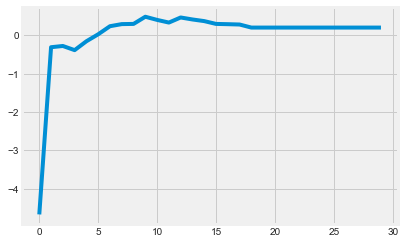

In [157]:
plt.plot([metrics.r2_score(y_val, np.mean(preds[:i+1], axis=0)) for i in range(30)])